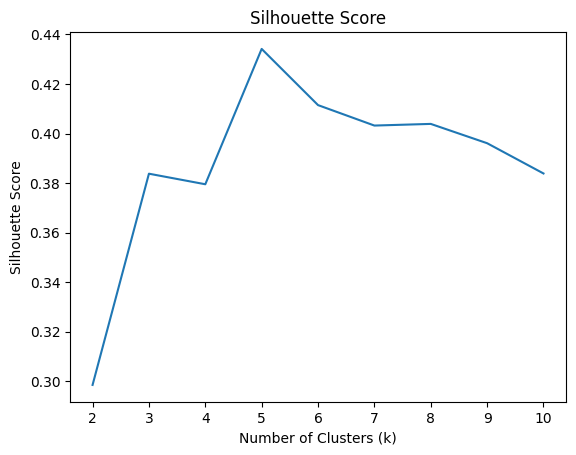

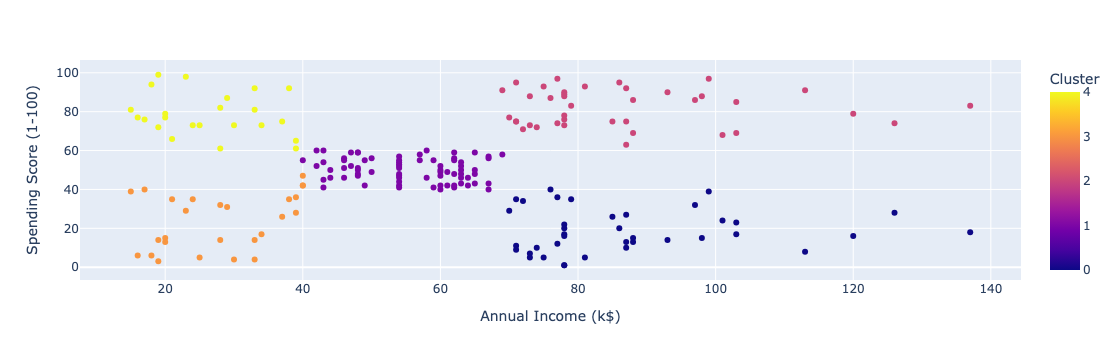

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import plotly.express as px
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")
data = data.drop(columns=["CustomerID"])

# Encode categorical variables
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])

# Choose a normalization technique
# Uncomment one of the normalization options below:

# Option 1: Min-Max scaling
# scaler = MinMaxScaler()
# data_norm = scaler.fit_transform(data)

# Option 2: Standard scaling
# scaler = StandardScaler()
# data_norm = scaler.fit_transform(data)
# Build the model
silhouette_scores = []
range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    birch = Birch(threshold=15, branching_factor= 90,n_clusters=n_clusters)
    cluster_labels = birch.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Plotting the silhouette scores
plt.plot(range_n_clusters, silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

model = Birch(threshold=15, branching_factor=90, n_clusters=5)

# Train the model
model.fit(data)

# Extract the cluster labels
labels = model.predict(data)

# Add the cluster labels to the original data
data["Cluster"] = labels


# Add the cluster names to the original data
# data["Cluster Name"] = data.apply(lambda x: cluster_name(x["Annual Income (k$)"], x["Spending Score (1-100)"]), axis=1)


# Visualize the clusters in 2D format
fig = px.scatter(data, x="Annual Income (k$)", y="Spending Score (1-100)", color="Cluster", hover_data=["Age", "Gender", "Annual Income (k$)", "Spending Score (1-100)", "Cluster"])
fig.show()


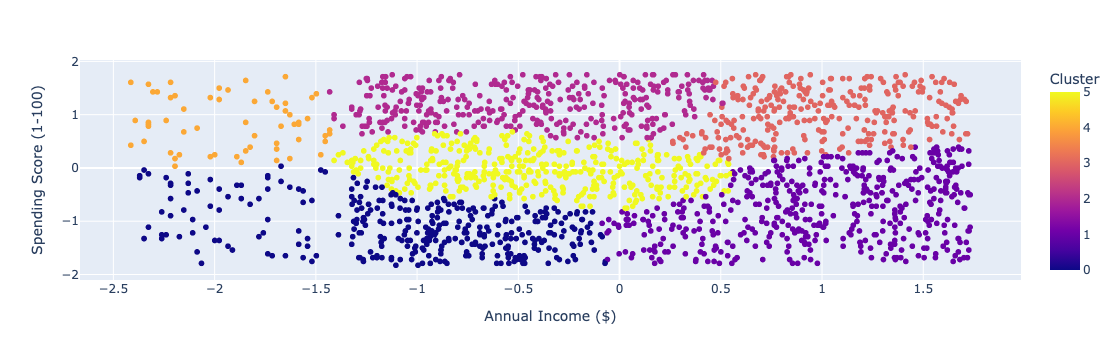

0.34165634628871644

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('./Customers.csv')

# Preprocess the dataset
df.dropna(inplace=True)
scaler = StandardScaler()
num_cols = ['Annual Income ($)', 'Spending Score (1-100)']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Select columns to decode
columns_to_decode = ['Annual Income ($)', 'Spending Score (1-100)']

# Get the original values of the columns
original_values = scaler.inverse_transform(df[columns_to_decode].values)

# Add the original values to the dataframe
for i, col in enumerate(columns_to_decode):
    df[col + ' (original)'] = original_values[:, i]

# Perform clustering using Birch algorithm
X = df[['Annual Income ($)', 'Spending Score (1-100)']].values
birch = Birch(threshold=0.55, branching_factor = 30, n_clusters=6)
birch.fit(X)

# Add the cluster labels to the original dataframe
df['Cluster'] = birch.predict(X)

# Print the data about the formed clusters
# for i in range(len(np.unique(birch.labels_))):
#     print("Cluster ", i+1, ":")
#     print(df.loc[df['Cluster'] == i])
#     print("")

# Visualize the output
fig = px.scatter(df, x='Annual Income ($)', y='Spending Score (1-100)', color='Cluster',
                 hover_data=['CustomerID', 'Gender', 'Age', 'Annual Income ($)', 'Annual Income ($) (original)',
                             'Spending Score (1-100)', 'Spending Score (1-100) (original)', 'Profession', 'Work Experience', 'Family Size'])
fig.show()

# Evaluate the performance of the algorithm
silhouette_score(X, birch.labels_)
